# Importing & installing necessary libraries


In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, merge, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf

import matplotlib.pyplot as plt
import skimage.io
from glob import glob

import numpy as np
import random as r
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
!pip install SimpleITK
import SimpleITK

     |████████████████████████████████| 47.4MB 107kB/s 


In [ ]:
import os

# Mounting Google Drive




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Unzip the dataset file

In [ ]:
#!unzip "/content/drive/MyDrive/brats18.zip" -d "/content/drive/MyDrive/"

# Reading the files (Flair Modality only)

In [ ]:
files=glob("/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/"+"**/*flair.nii",recursive="True")

In [ ]:
files

['/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii',
 '/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_flair.nii',
 '/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_12_1/Brats18_2013_12_1_flair.nii',
 '/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_13_1/Brats18_2013_13_1_flair.nii',
 '/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_14_1/Brats18_2013_14_1_flair.nii',
 '/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_17_1/Brats18_2013_17_1_flair.nii',
 '/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_18_1/Brats18_2013_18_1_flair.nii',
 '/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_flair.nii',
 '/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_20_1/Brats18_2013_20_1_flair.nii',
 '/content/drive/My

In [ ]:
len(files)

210

# Taking a sample image and its view from 3 planes:
###                                     1. Axial plane
###                                     2. Coronal plane
###                                     3. Sagittal plane














In [ ]:
im1=skimage.io.imread(files[25],plugin="simpleitk")

In [ ]:
print(f"shape:{im1.shape}")
print(f"dtype:{im1.dtype}")

shape:(155, 240, 240)
dtype:int16


## Axial plane:



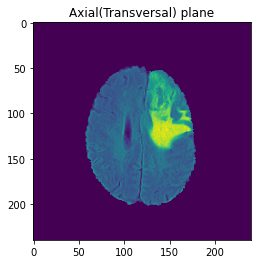

In [ ]:
plt.imshow(im1[100,:,:])
plt.title("Axial(Transversal) plane")
plt.show()

## Coronal plane:

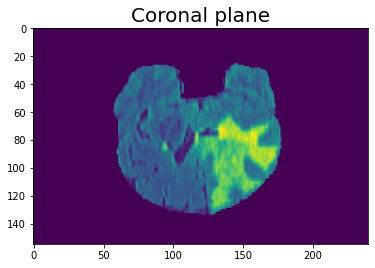

In [ ]:
plt.imshow(im1[:,100,:])
plt.title("Coronal plane",fontsize=20)
plt.show()

## Sagittal plane:

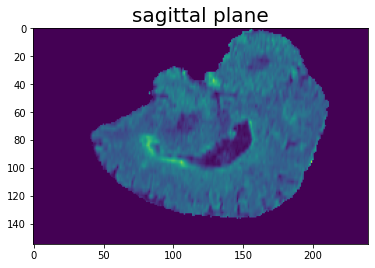

In [ ]:
plt.imshow(im1[:,:,100])
plt.title("sagittal plane",fontsize=20)
plt.show()

In [ ]:
files[25]

'/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABE_1/Brats18_CBICA_ABE_1_flair.nii'

# Reading the segmented image from the same folder by replacing "flair" in the above path by "seg":

In [ ]:
seg_im1=skimage.io.imread("/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABE_1/Brats18_CBICA_ABE_1_seg.nii",plugin="simpleitk")


In [ ]:
a=seg_im1.copy()
z=len(a.flatten())
z

8928000

In [ ]:
b=a.flatten()
c0=b[b==0]
c1=b[b==1]
c2=b[b==2]
c4=b[b==4]

l1=[len(c0)/z,len(c1)/z,len(c2)/z,len(c4)/z]
l1=[l*100 for l in l1]


[98.44052419354838,
 0.22207661290322578,
 1.0579749103942653,
 0.2794242831541218]

## Class Imbalance:

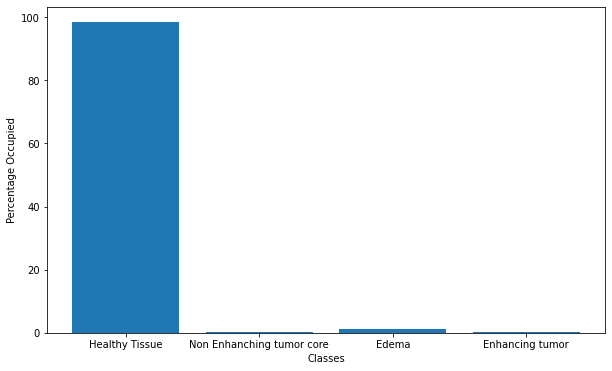

In [ ]:
classes=["Healthy Tissue","Non Enhanching tumor core","Edema","Enhancing tumor"]
plt.figure(figsize=(10,6))
plt.bar(classes,l1)
plt.xlabel("Classes")
plt.ylabel("Percentage Occupied")
plt.show()

# Viewing four modalities:
###                       1.Flair
###                       2.T1
###                       3.T1ce
###                       4.T2

## Flair:

In [ ]:
flair_example=skimage.io.imread("/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABE_1/Brats18_CBICA_ABE_1_flair.nii",plugin="simpleitk")

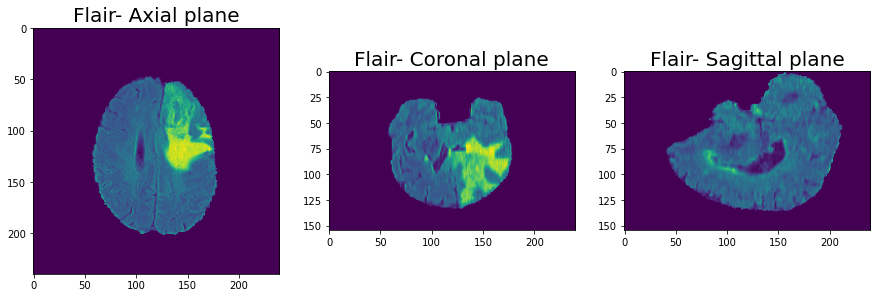

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(flair_example[100,:,:])
plt.title("Flair- Axial plane",fontsize=20)

plt.subplot(1,3,2)
plt.imshow(flair_example[:,100,:])
plt.title("Flair- Coronal plane",fontsize=20)

plt.subplot(1,3,3)
plt.imshow(flair_example[:,:,100])
plt.title("Flair- Sagittal plane",fontsize=20)
plt.show()




## t1:

In [ ]:
t1_example=skimage.io.imread("/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABE_1/Brats18_CBICA_ABE_1_t1.nii",plugin="simpleitk")

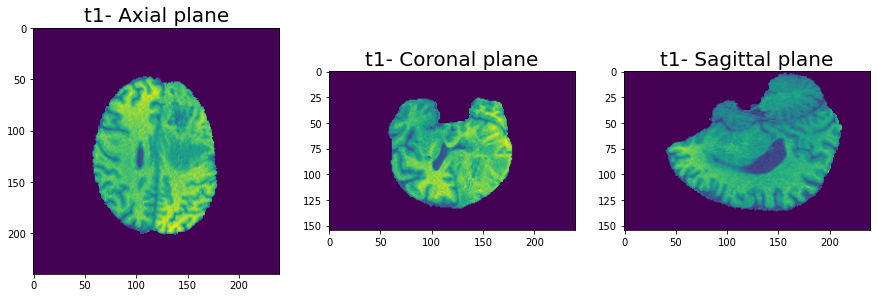

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(t1_example[100,:,:])
plt.title("t1- Axial plane",fontsize=20)

plt.subplot(1,3,2)
plt.imshow(t1_example[:,100,:])
plt.title("t1- Coronal plane",fontsize=20)

plt.subplot(1,3,3)
plt.imshow(t1_example[:,:,100])
plt.title("t1- Sagittal plane",fontsize=20)
plt.show()

## t1ce:

In [ ]:
t1ce_example=skimage.io.imread("/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABE_1/Brats18_CBICA_ABE_1_t1ce.nii",plugin="simpleitk")

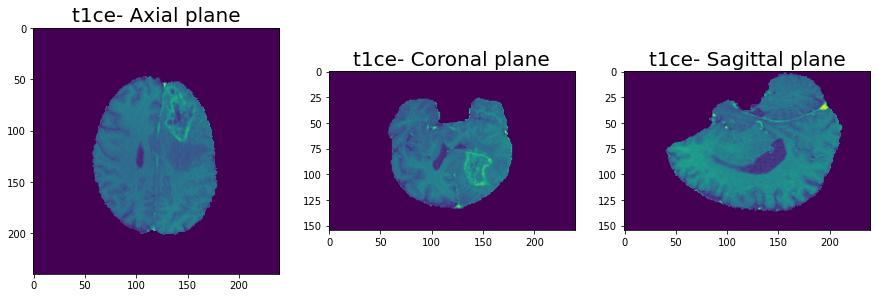

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(t1ce_example[100,:,:])
plt.title("t1ce- Axial plane",fontsize=20)

plt.subplot(1,3,2)
plt.imshow(t1ce_example[:,100,:])
plt.title("t1ce- Coronal plane",fontsize=20)

plt.subplot(1,3,3)
plt.imshow(t1ce_example[:,:,100])
plt.title("t1ce- Sagittal plane",fontsize=20)
plt.show()

## t2:

In [ ]:
t2_example=skimage.io.imread("/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABE_1/Brats18_CBICA_ABE_1_t2.nii",plugin="simpleitk")

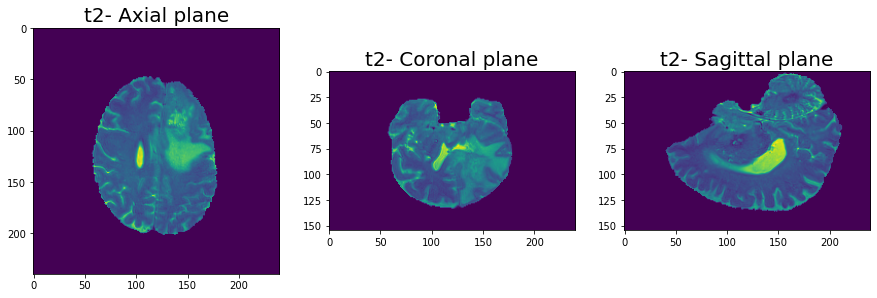

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(t2_example[100,:,:])
plt.title("t2- Axial plane",fontsize=20)

plt.subplot(1,3,2)
plt.imshow(t2_example[:,100,:])
plt.title("t2- Coronal plane",fontsize=20)

plt.subplot(1,3,3)
plt.imshow(t2_example[:,:,100])
plt.title("t2- Sagittal plane",fontsize=20)
plt.show()

# data type of segmented image:


In [ ]:
print(f"shape:{seg_im1.shape}")
print(f"dtype:{seg_im1.dtype}")

shape:(155, 240, 240)
dtype:uint8


# Segmented image on 3 planes:

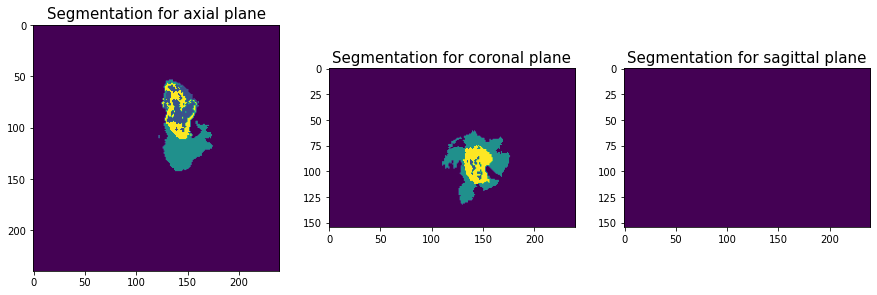

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(seg_im1[100,:,:])
plt.title("Segmentation for axial plane",fontsize=15)

plt.subplot(1,3,2)
plt.imshow(seg_im1[:,100,:])
plt.title("Segmentation for coronal plane",fontsize=15)

plt.subplot(1,3,3)
plt.imshow(seg_im1[:,:,100])
plt.title("Segmentation for sagittal plane",fontsize=15)

plt.show()

### This function below takes images of a particular modality into consideration and returns one array corresponding to each modality which eventually helps us to prepare our training data.
### The end part specifies the modality, and the path corresponds to the folders.
### We have used first 200 images to train our model, and for each image out of 155 slides we take 60-130th slide because that contains most of the relavant information required to train our model.

In [ ]:
def array_converter(path,end):
    files=glob(path+end,recursive=True)
    files1=files[0:200]

    img_list=[]
    
    r.seed(42)
    r.shuffle(files1)
    
    for file in files1:
        img = skimage.io.imread(file, plugin="simpleitk")
        #Standardization:
        img = (img-img.mean())/img.std()
        img.astype("float32")

        for slice in range(60,130):
            img_s=img[slice,:,:]

            img_s=cv2.resize(img_s,(128,128))
            img_s=np.expand_dims(img_s,axis=0)
            img_list.append(img_s)
    return np.array(img_list,np.float32)



## Total tumor:

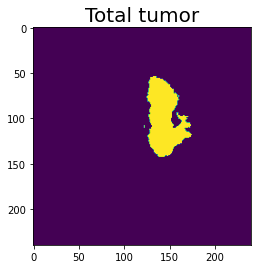

In [ ]:
#Shows total tumor
seg_im1_copy=seg_im1.copy()
seg_im1_copy[seg_im1_copy!=0]=1
plt.imshow(seg_im1_copy[100,:,:])
plt.title("Total tumor",fontsize=20)
plt.show()

# Visualization of different labels:

## Non-enhancing tumor:

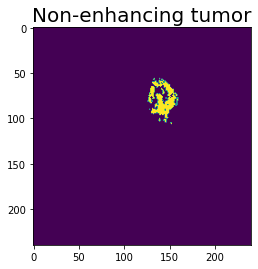

In [ ]:
#Shows non enhancing tumor
seg_noneh_tumor=seg_im1.copy()
seg_noneh_tumor[seg_noneh_tumor!=1]=0
plt.imshow(seg_noneh_tumor[100,:,:])
plt.title("Non-enhancing tumor",fontsize=20)
plt.show()

## Edema:

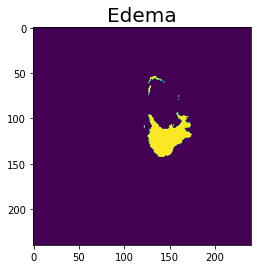

In [ ]:
#Shows Edema
seg_edema=seg_im1.copy()
seg_edema[seg_edema==1]=0 #Cover Non-enhancing tumor
seg_edema[seg_edema==4]=0 #Cover Enhancing tumor
seg_edema[seg_edema!=0]=1 #Show Edema
plt.imshow(seg_edema[100,:,:])
plt.title("Edema",fontsize=20)
plt.show()

## Enhancing tumor:

Text(0.5, 1.0, 'Enhancing tumor')

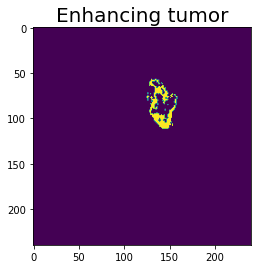

In [ ]:
#Shows Enhancing tumor:
seg_enh=seg_im1.copy()
seg_enh[seg_enh!=4]=0 

plt.imshow(seg_enh[100,:,:])
plt.title("Enhancing tumor",fontsize=20)

In [ ]:
path="/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/" #path to HGG images

In [ ]:
train_flair=array_converter(path=path,end="**/*flair.nii") #Create an array corresponding to the flair modality of the train images.

In [ ]:
train_flair.shape 

(14000, 1, 128, 128)

### Visualization of a random slice from the train_flair array:

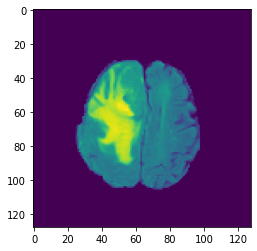

In [ ]:
plt.imshow(train_flair[250].reshape(128,128))

In [ ]:
t1ce = array_converter(path=path, end='**/*t1ce.nii') #Create an array corresponding to the t1ce modality of the train images

### Visualization of a random slice from the t1ce array:

In [ ]:
t1ce.shape

(14000, 1, 128, 128)

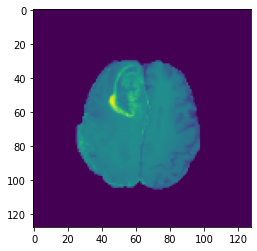

In [ ]:
plt.imshow(t1ce[250].reshape(128,128))

## This is another function (ONLY FOR THE SEGMENTED SCAN IMAGES) which takes input the path,end and the label we need as input and creates an array corresponding to a specific label. These work as our target while training.

In [ ]:
def seg_to_array(path,end,label):
    files=glob(path+end,recursive=True)
    files1=files[0:200]

    img_list=[]

    r.seed(42)
    r.shuffle(files1)

    for file in files1:
        img=skimage.io.imread(file,plugin="simpleitk")

        #all tumor
        if label==1:
            img[img != 0]=1
        #Non enhancing tumor
        if label==2:
            img[img != 1]=0
        #without Edema:
        if label==3:
            img[img==2]=0
            img[img!=0]=1
        #Enhancing tumor:
        if label==4:
            img[img!=4]=0
            img[img==4]=1

        img.astype("float32")

        for slice in range(60,130):
            img_s=img[slice,:,:]
            img_s=cv2.resize(img_s,(128,128))
            img_s=np.expand_dims(img_s,axis=0)
            img_list.append(img_s)

    return np.array(img_list,np.float32)


In [ ]:
all_tumor=seg_to_array(path,end="**/*seg.nii",label=1) #Creates an array for the whole tumor
all_tumor.shape

(14000, 1, 128, 128)

In [ ]:
non_enhancing = seg_to_array(path=path, end="**/*seg.nii", label=2) #creates an array corresponding to the non-enhancing tumor core label.
non_enhancing.shape

(14000, 1, 128, 128)

In [ ]:
without_edema = seg_to_array(path=path, end="**/*seg.nii", label=3)  #Creates an array for the tumor without edema.
without_edema.shape

(14000, 1, 128, 128)

In [ ]:
enhancing = seg_to_array(path=path, end="**/*seg.nii", label=4) #creates an array for the enhancing tumor.
enhancing.shape

(14000, 1, 128, 128)

In [ ]:
original = seg_to_array(path=path, end="**/*seg.nii", label=0) #Creates an array for the original segmented image
original.shape

(14000, 1, 128, 128)

In [ ]:
idx=250

# Visualization of different labels:

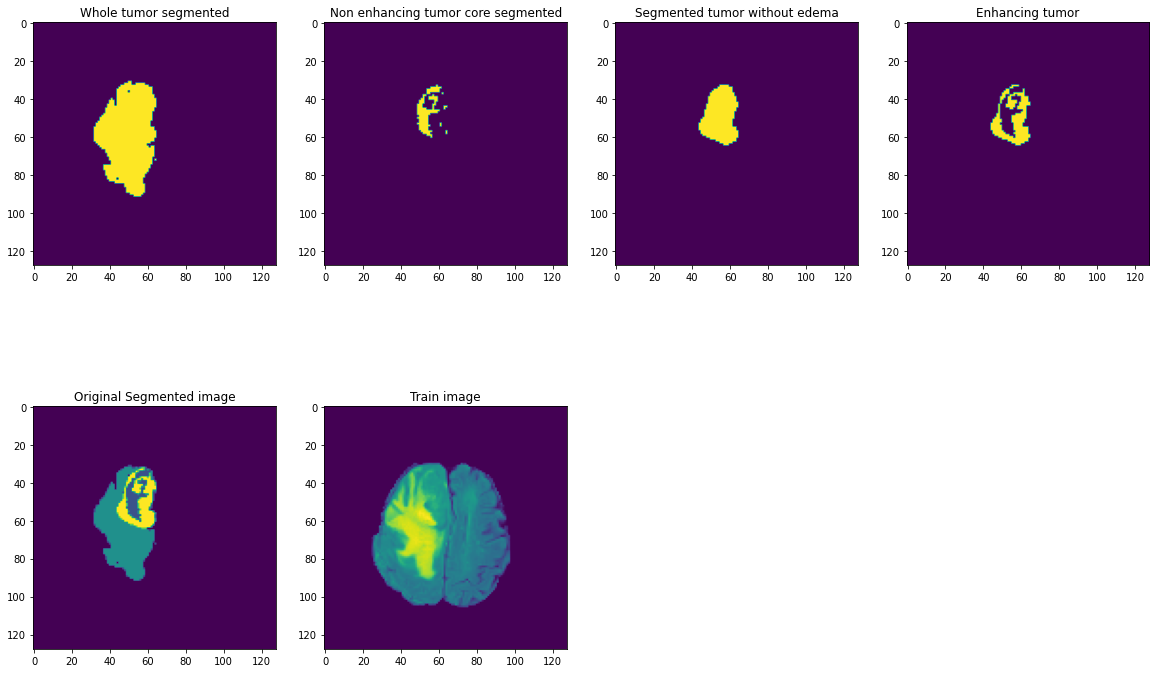

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
plt.imshow(all_tumor[idx].reshape(128,128))
plt.title("Whole tumor segmented",fontsize=12)

plt.subplot(3,4,2)
plt.imshow(non_enhancing[idx].reshape(128,128))
plt.title("Non enhancing tumor core segmented",fontsize=12)

plt.subplot(3,4,3)
plt.imshow(without_edema[idx].reshape(128,128))
plt.title("Segmented tumor without edema",fontsize=12)

plt.subplot(3,4,4)
plt.imshow(enhancing[idx].reshape(128,128))
plt.title("Enhancing tumor")

plt.subplot(3,4,5)
plt.imshow(original[idx].reshape(128,128))
plt.title("Original Segmented image")

plt.subplot(3,4,6)
plt.imshow(train_flair[idx].reshape(128,128))
plt.title("Train image")

plt.show()

## Create the training array for flair modality

In [ ]:
flair = array_converter(path=path, end="**/*flair.nii")

In [ ]:
flair.shape

(14000, 1, 128, 128)

## Creating the training array for t2 modality:

In [ ]:
t2 = array_converter(path=path, end="**/*t2.nii")


In [ ]:
t2.shape

(14000, 1, 128, 128)

## Concatenating two arrays for preparing X_train , which is input to our model

In [ ]:
X_train = np.concatenate((flair, t2), axis=1)

In [ ]:
X_train.shape

(14000, 2, 128, 128)

In [ ]:
X_train.dtype

dtype('float32')

## Segmented image array: (Whole tumor)

In [ ]:
seg = seg_to_array(path=path, end="**/*seg.nii",label=1)
seg.shape

(14000, 1, 128, 128)

## Dice Coefficient:

In [ ]:
def dice_coef(y_true, y_pred):
    smooth = 0.005 
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

## Dice loss:

In [ ]:
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

### As the shape of the train array is (Number of slices,Number of modalities,height,width) so, we need to set:

In [ ]:
K.set_image_data_format('channels_first')

# **UNet 2D Architecture:**

In [ ]:
def unet1():

    inputs = Input((2, 128 , 128))

    conv1 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(inputs)
    batch1=BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(batch1)
    batch1=BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(batch1)

    conv2 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2))(batch2)

    conv3 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    drop4 = Dropout(0.25)(batch4)
    pool4 = MaxPooling2D((2, 2))(drop4)

    conv5 = Conv2D(1024, (3,3), activation = 'relu', padding = 'same')(pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3,3), activation = 'relu', padding = 'same')(batch5)
    batch5 = BatchNormalization(axis=1)(conv5)
    drop5 = Dropout(0.25)(batch5)

    up6 = Conv2DTranspose(512, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([up6,drop4], axis = 1)
    conv6 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(merge6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same')(batch6)
    batch6 = BatchNormalization(axis=1)(conv6)

    up7 = Conv2DTranspose(256, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(batch6))
    merge7 = concatenate([up7,conv3], axis = 1)
    conv7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(merge7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(batch7)
    batch7 = BatchNormalization(axis=1)(conv7)

    up8 = Conv2DTranspose(128, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(batch7))
    merge8 = concatenate([up8,conv2], axis = 1)
    conv8 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(merge8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(batch8)
    batch8 = BatchNormalization(axis=1)(conv8)

    up9 = Conv2DTranspose(64, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(batch8))
    merge9 = concatenate([up9,conv1], axis = 1)
    conv9 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(merge9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(batch9)
    batch9 = BatchNormalization(axis=1)(conv9)
    
    conv10 = Conv2D(1, (1,1), activation = 'sigmoid')(batch9)

    model = Model(inputs = [inputs], outputs = [conv10])

    model.compile(optimizer=Adam(learning_rate=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    
    #model.summary()

    return model

In [ ]:
model1=unet1()
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2, 128, 128) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 128, 128) 1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 128, 128) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 128, 128) 36928       batch_normalization[0][0]        
______________________________________________________________________________________________

# **Training:**
 We train with 200 images with a validation split of 0.25, i.e. we use 150 images to train the model and 50 images for validation. 

In [ ]:
history1=model1.fit(X_train, seg, validation_split=0.25, batch_size=32, epochs=50, shuffle=True)

Epoch 1/50
329/329 [==============================] - 137s 302ms/step - loss: 0.8215 - dice_coef: 0.1785 - val_loss: 0.8179 - val_dice_coef: 0.1811
Epoch 2/50
329/329 [==============================] - 96s 291ms/step - loss: 0.6042 - dice_coef: 0.3958 - val_loss: 0.5794 - val_dice_coef: 0.4182
Epoch 3/50
329/329 [==============================] - 96s 291ms/step - loss: 0.4046 - dice_coef: 0.5954 - val_loss: 0.2757 - val_dice_coef: 0.7202
Epoch 4/50
329/329 [==============================] - 96s 291ms/step - loss: 0.2413 - dice_coef: 0.7587 - val_loss: 0.2650 - val_dice_coef: 0.7308
Epoch 5/50
329/329 [==============================] - 96s 291ms/step - loss: 0.1676 - dice_coef: 0.8324 - val_loss: 0.2617 - val_dice_coef: 0.7341
Epoch 6/50
329/329 [==============================] - 96s 290ms/step - loss: 0.1289 - dice_coef: 0.8711 - val_loss: 0.2573 - val_dice_coef: 0.7385
Epoch 7/50
329/329 [==============================] - 96s 291ms/step - loss: 0.1152 - dice_coef: 0.8848 - val_loss: 0

In [ ]:
model1.save_weights("/content/drive/MyDrive/working models brats 18/final.h5")

###Mean Validation loss

In [ ]:
np.mean(history1.history["val_loss"])

0.2510873436927795

## Loss and Accuracy plots (Train and validation)

### Loss:

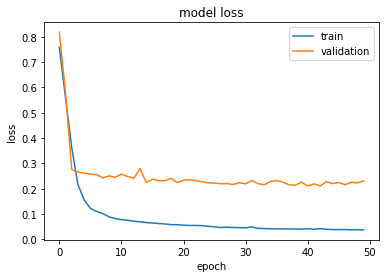

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Accuracy:

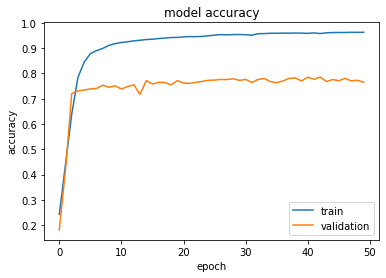

In [ ]:
plt.plot(history1.history['dice_coef'])
plt.plot(history1.history['val_dice_coef'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

##  Now we shall test our model on some new or unseen test data.



In [ ]:
path="/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG/"

### We use 200-210th images for segmentation prediction results which we left during training

In [ ]:
all_images=os.listdir(path)
test_images=all_images[200:210]
test_images

['Brats18_TCIA08_205_1',
 'Brats18_TCIA08_218_1',
 'Brats18_TCIA08_234_1',
 'Brats18_TCIA08_242_1',
 'Brats18_TCIA08_278_1',
 'Brats18_TCIA08_280_1',
 'Brats18_TCIA08_319_1',
 'Brats18_TCIA08_406_1',
 'Brats18_TCIA08_436_1',
 'Brats18_TCIA08_469_1']

### We define two functions which take an MR image as input and returns an array- First function single_im_arr_converter is for modalities and the other one single_seg_to_array is for segmented images. This is to prepare input arrays to our model for testing.

In [ ]:
# This function takes input a single modality image and returns an array 
def single_im_arr_converter(im_path):
    

    img_list=[]
    
    img = skimage.io.imread(im_path, plugin="simpleitk")
    #Standardization:
    img = (img-img.mean())/img.std()
    img.astype("float32")

    for slice in range(60,130):
        img_s=img[slice,:,:]

        img_s=cv2.resize(img_s,(128,128))
        img_s=np.expand_dims(img_s,axis=0)
        img_list.append(img_s)
    return np.array(img_list,np.float32)

# This function takes input a segmented image(of the format seg.nii) and returns an array corresponding to a specified label
def single_seg_to_array(im_path,label):

    
    
    img=skimage.io.imread(im_path,plugin="simpleitk")
    img_list=[]

    #all tumor
    if label==1:
        img[img != 0]=1
    #Non enhancing tumor
    if label==2:
        img[img != 1]=0
    #without Edema:
    if label==3:
        img[img==2]=0
        img[img!=0]=1
    #Enhancing tumor:
    if label==4:
        img[img!=4]=0
        img[img==4]=1

    for slice in range(60,130):
        img_s=img[slice,:,:]
        img_s=cv2.resize(img_s,(128,128))
        img_s=np.expand_dims(img_s,axis=0)
        img_list.append(img_s)

    return np.array(img_list,np.float32)




In [ ]:
flair_test=glob(path+"/"+test_images[3]+"/"+"*flair.nii",recursive=True)
t2_test=glob(path+"/"+test_images[3]+"/"+"*t2.nii",recursive=True)
seg_test=glob(path+"/"+test_images[3]+"/"+"*seg.nii",recursive=True)


In [ ]:
seg_test[0]

'/content/drive/MyDrive/MICCAI_BraTS_2018_Data_Training/HGG//Brats18_TCIA08_242_1/Brats18_TCIA08_242_1_seg.nii'

In [ ]:
flair_test=single_im_arr_converter(flair_test[0])
t2_test=single_im_arr_converter(t2_test[0])
seg_test=single_seg_to_array(seg_test[0],1)

print(flair_test.shape)
print(t2_test.shape)
print(seg_test.shape)

(70, 1, 128, 128)
(70, 1, 128, 128)
(70, 1, 128, 128)


In [ ]:
X_test=np.concatenate((flair_test,t2_test),axis=1)
X_test.shape

(70, 2, 128, 128)

### View test image:

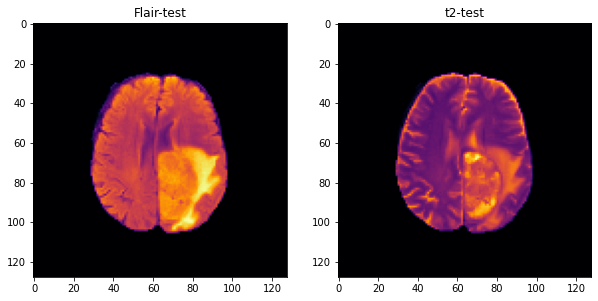

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(X_test[25][0],cmap="inferno")
plt.title("Flair-test")

plt.subplot(1,2,2)
plt.imshow(X_test[25][1],cmap="inferno")
plt.title("t2-test")

plt.show()

## View prediction and original segmented image:

In [ ]:
expand_img = np.expand_dims(X_test[25], axis=0)
pred = model1.predict(expand_img)
pred.shape

(1, 1, 128, 128)

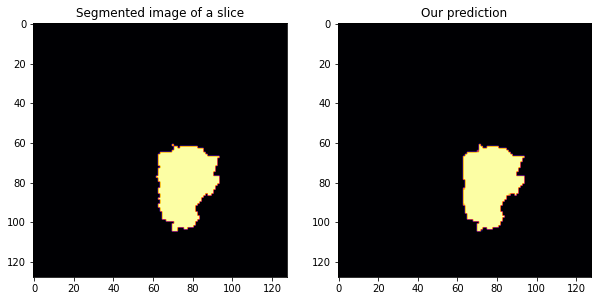

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(seg_test[25][0],cmap="inferno")
plt.title("Segmented image of a slice")

plt.subplot(1,2,2)
plt.imshow(pred[0][0],cmap="inferno")
plt.title("Our prediction")

plt.show()

In [ ]:
model2=unet1()
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2, 128, 128) 0                                            
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 64, 128, 128) 1216        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 64, 128, 128) 256         conv2d_38[0][0]                  
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 64, 128, 128) 36928       batch_normalization_36[0][0]     
____________________________________________________________________________________________

In [ ]:
seg2 = seg_to_array(path=path, end="**/*seg.nii",label=4)
seg2.shape

(14000, 1, 128, 128)

## Training for predicting the enhancing tumor using same architecture

In [ ]:
hist5=model2.fit(X_train, seg2, validation_split=0.25, batch_size=32, epochs=30, shuffle=True)

Epoch 1/30
329/329 [==============================] - 101s 295ms/step - loss: 0.9549 - dice_coef: 0.0451 - val_loss: 0.9533 - val_dice_coef: 0.0464
Epoch 2/30
329/329 [==============================] - 96s 291ms/step - loss: 0.8866 - dice_coef: 0.1134 - val_loss: 0.9156 - val_dice_coef: 0.0839
Epoch 3/30
329/329 [==============================] - 96s 291ms/step - loss: 0.8011 - dice_coef: 0.1989 - val_loss: 0.7630 - val_dice_coef: 0.2356
Epoch 4/30
329/329 [==============================] - 96s 291ms/step - loss: 0.7098 - dice_coef: 0.2902 - val_loss: 0.7614 - val_dice_coef: 0.2372
Epoch 5/30
329/329 [==============================] - 96s 291ms/step - loss: 0.6286 - dice_coef: 0.3714 - val_loss: 0.7311 - val_dice_coef: 0.2674
Epoch 6/30
329/329 [==============================] - 96s 291ms/step - loss: 0.5827 - dice_coef: 0.4172 - val_loss: 0.7460 - val_dice_coef: 0.2525
Epoch 7/30
329/329 [==============================] - 96s 291ms/step - loss: 0.5391 - dice_coef: 0.4609 - val_loss: 0

In [ ]:
seg_test=glob(path+"/"+test_images[3]+"/"+"*seg.nii",recursive=True)

In [ ]:
seg2_test=single_seg_to_array(seg_test[0],4)
seg2_test.shape

(70, 1, 128, 128)

In [ ]:
pred2=model2.predict(expand_img)
pred2.shape

(1, 1, 128, 128)

## Viewing predictions and ground truths corresponding to the enhancing tumor

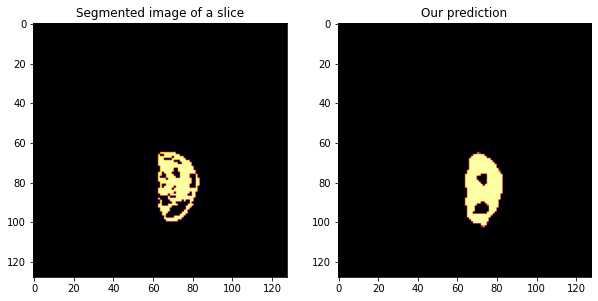

In [ ]:

plt.subplot(1,2,1)
plt.imshow(seg2_test[25][0],cmap="inferno")
plt.title("Segmented image of a slice")

plt.subplot(1,2,2)
plt.imshow(pred2[0][0],cmap="inferno")
plt.title("Our prediction")

plt.show()

# **Cropping:**

## We have used a subset of the images to train while using the cropped images.
## The functions below are for the subset of the images and do the same as the previous functions

In [ ]:

def array_converter2(path,end):
    files=glob(path+end,recursive=True)
    files1=files[0:50]

    img_list=[]
    
    r.seed(42)
    r.shuffle(files1)
    
    for file in files1:
        img = skimage.io.imread(file, plugin="simpleitk")
        #Standardization:
        img = (img-img.mean())/img.std()
        img.astype("float32")

        for slice in range(60,130):
            img_s=img[slice,:,:]

            img_s=cv2.resize(img_s,(128,128))
            img_s=np.expand_dims(img_s,axis=0)
            img_list.append(img_s)
    return np.array(img_list,np.float32)

In [ ]:
def seg_to_array2(path,end,label):
    files=glob(path+end,recursive=True)
    files1=files[0:50]

    img_list=[]

    r.seed(42)
    r.shuffle(files1)

    for file in files1:
        img=skimage.io.imread(file,plugin="simpleitk")

        #all tumor
        if label==1:
            img[img != 0]=1
        #Non enhancing tumor
        if label==2:
            img[img != 1]=0
        #without Edema:
        if label==3:
            img[img==2]=0
            img[img!=0]=1
        #Enhancing tumor:
        if label==4:
            img[img!=4]=0
            img[img==4]=1

        img.astype("float32")

        for slice in range(60,130):
            img_s=img[slice,:,:]
            img_s=cv2.resize(img_s,(128,128))
            img_s=np.expand_dims(img_s,axis=0)
            img_list.append(img_s)

    return np.array(img_list,np.float32)


In [ ]:
flair2 = array_converter2(path=path, end="**/*flair.nii")
t1_2=array_converter2(path=path, end="**/*t1.nii")
t1ce_2=array_converter2(path=path, end="**/*t1ce.nii")
t2_2=array_converter2(path=path, end="**/*t2.nii")

print(flair2.shape)
print(t1_2.shape)
print(t1ce_2.shape)
print(t2_2.shape)

(3500, 1, 128, 128)
(3500, 1, 128, 128)
(3500, 1, 128, 128)
(3500, 1, 128, 128)


In [ ]:
all_tumor2=seg_to_array2(path,end="**/*seg.nii",label=1)
without_edema2=seg_to_array2(path,end="**/*seg.nii",label=3)
non_enhancing2=seg_to_array2(path,end="**/*seg.nii",label=2)
enhancing2=seg_to_array2(path,end="**/*seg.nii",label=4)

print(all_tumor2.shape)
print(non_enhancing2.shape)
print(without_edema2.shape)
print(enhancing2.shape)


(3500, 1, 128, 128)
(3500, 1, 128, 128)
(3500, 1, 128, 128)
(3500, 1, 128, 128)


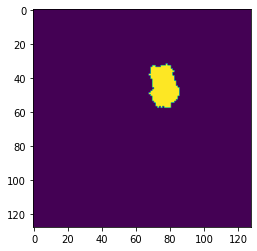

In [ ]:
tmp = without_edema2[25,0,:,:] #Taking a slice out from the images without the edema part

tmp.shape

plt.imshow(tmp);


In [ ]:
# thresholding the images
tmp[tmp > 0.2] = 1
tmp[tmp != 1] = 0

In [ ]:
index_xy = np.where(tmp==1) #Co-ordinates of where the tumor is

In [ ]:

index_xy[0] # Y co-ordinates

array([32, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34,
       34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42,
       42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
       49, 49, 49, 49, 49

In [ ]:
index_xy[1] # X co-ordinates

array([78, 70, 71, 75, 76, 77, 78, 79, 80, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79, 80, 81, 82, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79, 80, 81, 82, 83, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       68, 69, 70, 71, 72

In [ ]:
center_y = (max(index_xy[0]) + min(index_xy[0])) / 2

center_y    #Center of the tumor- Y co-ordinate

44.5

In [ ]:
center_x = (max(index_xy[1]) + min(index_xy[1])) / 2

center_x    #Center of the tumor- X co-ordinate

76.5

In [ ]:
img_x = np.zeros((64,64), np.float32)

img_x.shape #Creating a zero matrix of dimension (64,64)

(64, 64)

In [ ]:
x = t1ce_2[25,0,:,:]
x.shape     #Corresponding t1ce slice.

(128, 128)

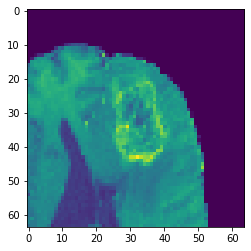

In [ ]:
img_x[:,:] = x[int(center_y - 64/2): int(center_y + 64/2), int(center_x - 64/2): int(center_x + 64/2)]

plt.imshow(img_x); #Cropping the t1ce slice

In [ ]:
seg_ = without_edema2[25,0,:,:]

seg_.shape 

(128, 128)

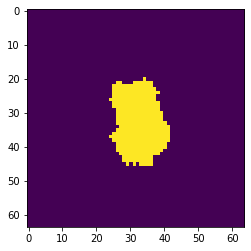

In [ ]:
img_x[:,:] = seg_[int(center_y - 64/2): int(center_y + 64/2), int(center_x - 64/2): int(center_x + 64/2)]


plt.imshow(img_x); #Cropping the segmented tumor, The tumor is clearer because of cropping.

## Now we define a function which crops the MRI modality using the segmented images. This takes input two images - first one is the MRI modality and second one is the corresponding segmented image 

In [ ]:
def crop_tumor(mr, seg):
  
  mr = mr[0]
  list_ = []

  # thresholding
  tmp = seg[0,:,:]
  tmp[tmp > 0.2] = 1
  tmp[tmp != 1] = 0
  index_xy = np.where(tmp==1)

  # some images contain no tumor !
  if index_xy[0] != []:

    center_y = (max(index_xy[0]) + min(index_xy[0])) / 2
    center_x = (max(index_xy[1]) + min(index_xy[1])) / 2

    img_x = np.zeros((64,64), np.float32)

    img_x[:,:] = mr[int(center_y - 64/2):int(center_y + 64/2), int(center_x - 64/2):int(center_x + 64/2)]

    list_.append(img_x)
  
  return np.array(list_)

## Visualizing the tumor after cropping:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


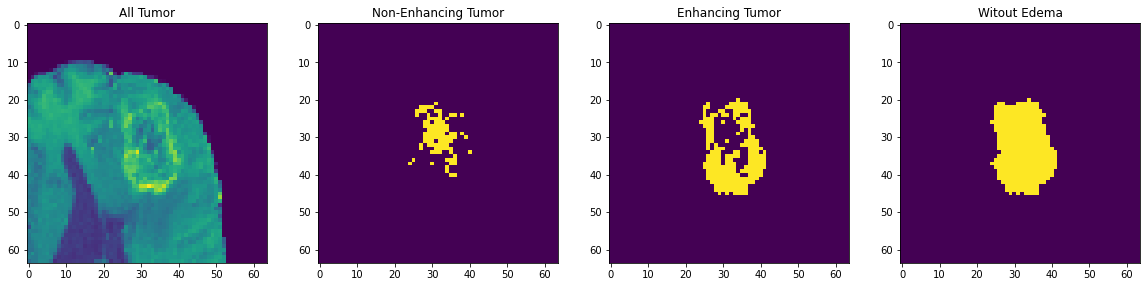

In [ ]:
img_25 = crop_tumor(mr=t1ce_2[25], seg=without_edema2[25])
non_25 = crop_tumor(mr=non_enhancing2[25], seg=without_edema2[25])
enhancing_25 = crop_tumor(mr=enhancing2[25], seg=without_edema2[25])
without_edema_25 = crop_tumor(mr=without_edema2[25], seg=without_edema2[25])


plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
plt.imshow(img_25[0])
plt.title("All Tumor")

plt.subplot(3,4,2)
plt.imshow(non_25[0])
plt.title("Non-Enhancing Tumor")

plt.subplot(3,4,3)
plt.imshow(enhancing_25[0])
plt.title("Enhancing Tumor")

plt.subplot(3,4,4)
plt.imshow(without_edema_25[0])
plt.title("Witout Edema");

## this is a function to create an array which we will use as inputs
## during our training from cropped images. This uses the previous crop_tumor function to make the arrays.

In [ ]:
def tumor_to_array(tumor, segmentation):

  im_list = []

  for i in range(len(segmentation)):
    img = crop_tumor(tumor[i], segmentation[i])

    if len(img.shape) > 2:
      im_list.append(img)

  return np.array(im_list)

In [ ]:
without_edema = tumor_to_array(without_edema2, without_edema2)
enhancing = tumor_to_array(enhancing2, without_edema2)
t1ce_crop = tumor_to_array(t1ce_2, without_edema2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


In [ ]:
without_edema.shape, enhancing.shape, t1ce_crop.shape

((1683, 1, 64, 64), (1683, 1, 64, 64), (1683, 1, 64, 64))

## Visualizing a slice from our input arrays:

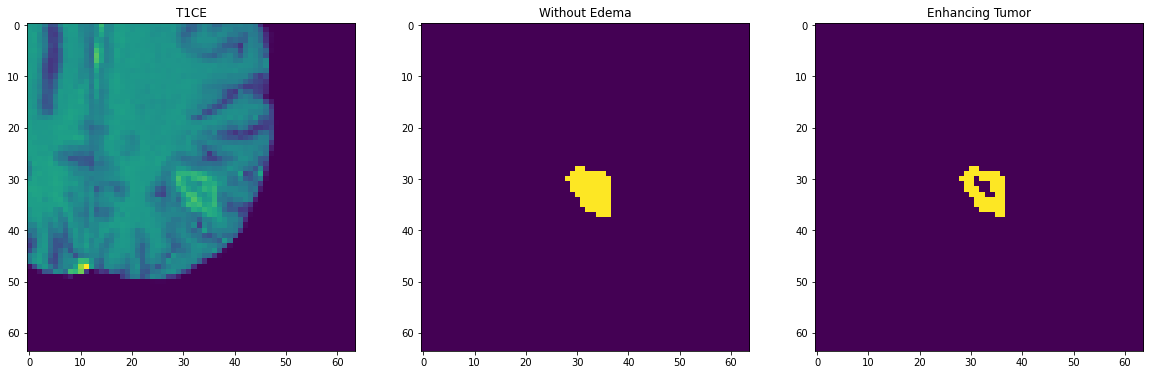

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(1,3,1)
plt.imshow(t1ce_crop[450,0,:,:])
plt.title("T1CE")

plt.subplot(1,3,2)
plt.imshow(without_edema[450,0,:,:])
plt.title("Without Edema")

plt.subplot(1,3,3)
plt.imshow(enhancing[450,0,:,:])
plt.title("Enhancing Tumor");


## **Unet architecture**:
Because we are using cropped images, we slightly had to change our architecture

In [ ]:
def unet():
    
    inputs = Input((1, 64 , 64))
    
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2))(batch1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2))(batch2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2))(batch3)
    
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(batch4)
    
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)
    
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (batch5)
    up6 = concatenate([up6, conv4], axis=1)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch6)
    batch6 = BatchNormalization(axis=1)(conv6)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch6)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)
    
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(batch9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    return model


## Training:

In [ ]:
model_enhancing = unet()

history = model_enhancing.fit(t1ce_crop, 
                              enhancing, 
                              validation_split=0.20, 
                              batch_size=16, 
                              epochs=50, 
                              shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
85/85 [==============================] - 11s 71ms/step - loss: 0.8714 - dice_coef: 0.1286 - val_loss: 0.9334 - val_dice_coef: 0.0638
Epoch 2/50
85/85 [==============================] - 4s 48ms/step - loss: 0.6956 - dice_coef: 0.3044 - val_loss: 0.8418 - val_dice_coef: 0.1514
Epoch 3/50
85/85 [==============================] - 4s 48ms/step - loss: 0.6251 - dice_coef: 0.3748 - val_loss: 0.7647 - val_dice_coef: 0.2253
Epoch 4/50
85/85 [==============================] - 4s 48ms/step - loss: 0.5517 - dice_coef: 0.4483 - val_loss: 0.5637 - val_dice_coef: 0.4177
Epoch 5/50
85/85 [==============================] - 4s 48ms/step - loss: 0.5115 - dice_coef: 0.4884 - val_loss: 0.5245 - val_dice_coef: 0.4553
Epoch 6/50
85/85 [==============================] - 4s 48ms/step - loss: 0.4605 - dice_coef: 0.5396 - val_loss: 0.4621 - val_dice_coef: 0.5150
Epoch 7/50
85/85 [==============================] - 4s 48ms/step - loss: 0.4187 - dice_coef: 0.5813 - val_loss: 0.4260 - val_dice_coef: 0.557

## Mean Validation Dice Coefficient

In [ ]:
np.mean(history.history["val_dice_coef"])

0.5784833359718323

## Visualizing Predictions :

Text(0.5, 1.0, 'Real Enhancing Tumor')

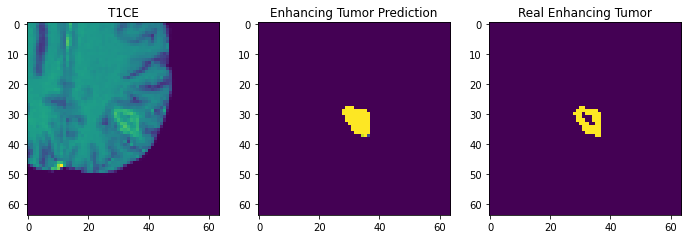

In [ ]:
idx = 450

plt.figure(figsize=(20,15))

plt.subplot(1,5,1)
plt.imshow(t1ce_crop[idx,0,:,:])
plt.title("T1CE")

pred_enhancing = model_enhancing.predict(t1ce_crop[idx:idx+1,:,:,:])
plt.subplot(1,5,2)
plt.imshow(pred_enhancing[0,0,:,:])
plt.title("Enhancing Tumor Prediction")

plt.subplot(1,5,3)
plt.imshow(enhancing[idx,0,:,:])
plt.title("Real Enhancing Tumor")
